<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Iris_Dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable
df['target'] = iris.target

# Print the head of the DataFrame
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


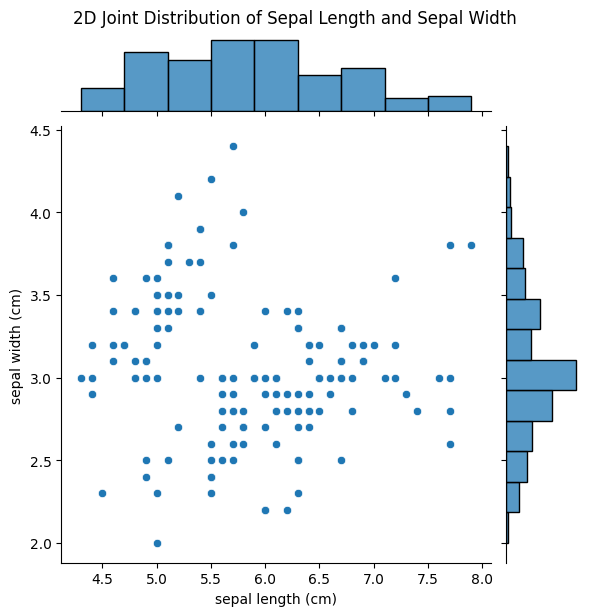

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2D joint distribution plot of sepal length and sepal width
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df, kind='scatter')
plt.suptitle('2D Joint Distribution of Sepal Length and Sepal Width', y=1.02) # Add a title to the figure
plt.show()

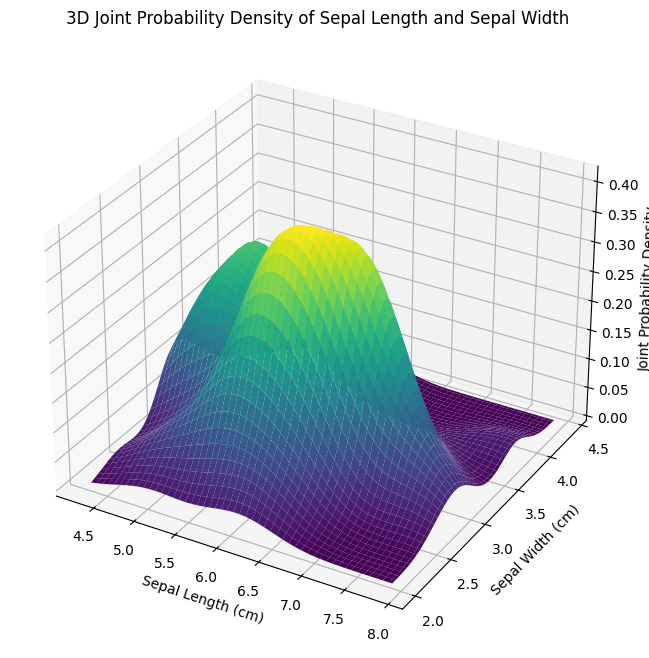

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract sepal length and sepal width
x = df['sepal length (cm)'].values
y = df['sepal width (cm)'].values

# Combine the data into a single array for KDE
data = np.vstack([x, y])

# Perform Kernel Density Estimation
kde = gaussian_kde(data)

# Create a grid for plotting the surface
x_grid, y_grid = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the KDE on the grid
z_grid = kde(xy_grid).reshape(x_grid.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Joint Probability Density')
plt.title('3D Joint Probability Density of Sepal Length and Sepal Width')

plt.show()

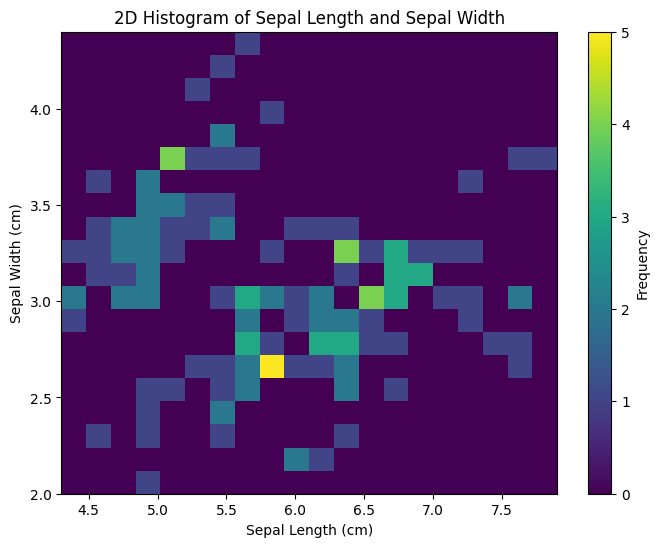

In [ ]:
import matplotlib.pyplot as plt

# Extract sepal length and sepal width
x = df['sepal length (cm)'].values
y = df['sepal width (cm)'].values

# Create a 2D histogram
# The 'bins' parameter controls the number of bins on each axis
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=(20, 20), cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('2D Histogram of Sepal Length and Sepal Width')
plt.show()

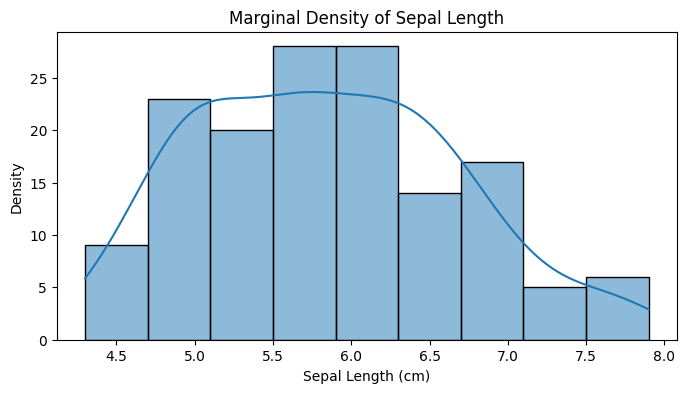

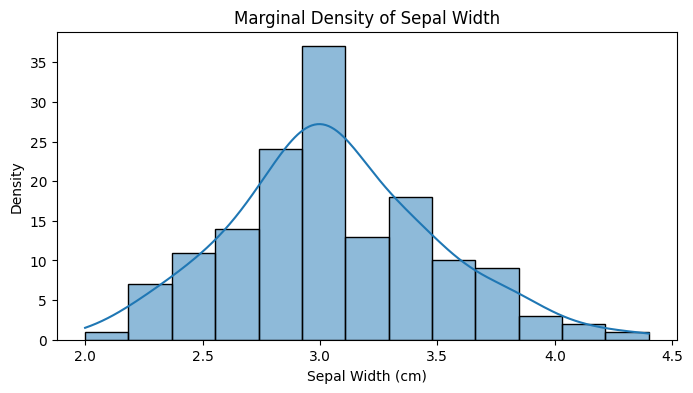

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot marginal density for Sepal Length
plt.figure(figsize=(8, 4))
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Marginal Density of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

# Plot marginal density for Sepal Width
plt.figure(figsize=(8, 4))
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Marginal Density of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.show()

# Check DOubt



if we double integrate these marginal densities we get that 3d plot right
That's a good thought, but not quite. Double integrating the marginal densities won't directly give you the 3D joint probability density plot.

Here's why:

Integration of Marginal Density: Integrating a single marginal density function over a specific range gives you the probability that the variable falls within that range. For example, integrating the marginal density of sepal length from 5 cm to 6 cm tells you the probability of a randomly selected iris having a sepal length between 5 and 6 cm.
Double Integration of Joint Density: Double integrating the joint probability density function over a specific 2D region (defined by ranges for both sepal length and sepal width) gives you the probability that both variables fall within that combined region. This is what the volume under the 3D surface plot represents over a given area on the x-y plane.
The 3D plot represents the density at each point (sepal length, sepal width), not the cumulative probability (which is what you get from integration).

Think of it this way: the marginal densities are like the profiles of a hill viewed from the x and y sides. The 3D joint density plot is the entire hill, showing the elevation (density) at every point on the ground (sepal length, sepal width). You can't reconstruct the entire hill just from its side profiles, especially if the hill has complex contours (due to the dependency between the variables).

Does that distinction make sense?


but we integrated it two times, first along x axis then along y axis and got the whole 3d figure
I understand your reasoning, but the process used to create the 3D plot (cell 9e93cbb5) didn't involve integrating the marginal densities.

Here's a breakdown of how that 3D surface plot was generated:

Extract Data: We took the sepal length and sepal width data from the DataFrame.
Kernel Density Estimation (KDE): We used Kernel Density Estimation, a statistical technique, to estimate the joint probability density function of sepal length and sepal width directly from the data. This process considers the relationship and dependencies between the two variables.
Create a Grid: We created a grid of points covering the range of sepal length and sepal width values.
Evaluate KDE on Grid: We evaluated the estimated joint probability density function (from step 2) at each point on this grid. This gave us a density value (the z-coordinate) for every combination of sepal length and sepal width on the grid.
Plot Surface: Finally, we plotted this grid of x, y, and z (density) values as a 3D surface.
So, instead of integrating marginal densities, we directly estimated the joint density and then visualized it in 3D. The integration of the joint density is used to calculate probabilities over specific regions, not to construct the density surface itself from marginals.

Does that clarify the process of creating the 3D plot?


but it still gives us z axis after integration, we have x and y already so we can reach back to that 4d plot right
I understand where the confusion might be coming from with the idea of integration leading to the z-axis. Let's break down what each part represents in the 3D plot (cell 9e93cbb5):

X-axis: Represents the values of Sepal Length.
Y-axis: Represents the values of Sepal Width.
Z-axis: Represents the Joint Probability Density at each combination of Sepal Length and Sepal Width. This is the height of the surface at that point. It tells us how likely it is to find data points in that specific region of the Sepal Length/Sepal Width space.
Think of it like a topographical map of a mountain. The x and y axes are latitude and longitude, and the z-axis is the elevation at that location. The 3D plot is like the entire mountain.

Now, regarding integration:

If you integrate the 3D joint probability density surface over a specific area on the x-y plane (a range of sepal length and a range of sepal width), the result is the volume under the surface within that area. This volume represents the probability that a randomly selected iris will have sepal length and sepal width values within those specific ranges.
So, the z-axis values are the density, and integrating these densities over an area gives you probability (a single value or a set of values defining a cumulative distribution), not a new 3D plot of densities.

We are visualizing a 3-dimensional relationship: two variables (sepal length and sepal width) and their joint probability density. There isn't a fourth dimension being represented in this particular plot.

Does that distinction between density (z-axis) and probability (obtained through integration of the density) help clarify things?

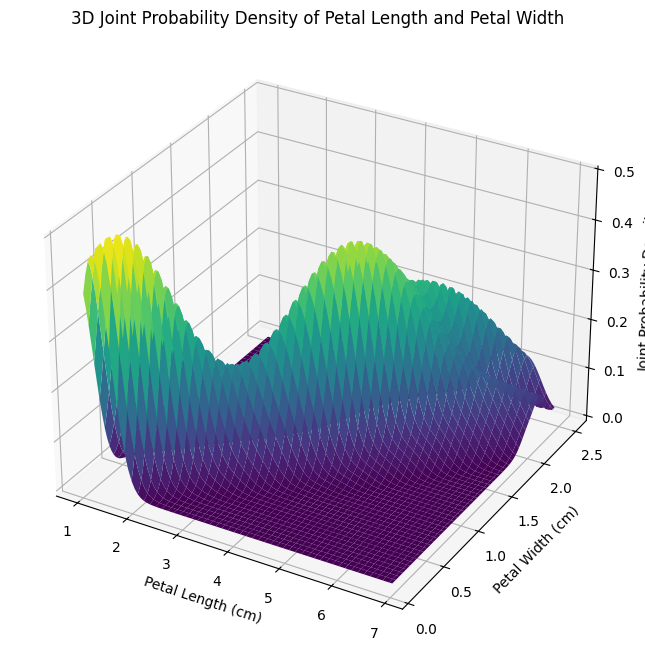

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract petal length and petal width
x_petal = df['petal length (cm)'].values
y_petal = df['petal width (cm)'].values

# Combine the data into a single array for KDE
data_petal = np.vstack([x_petal, y_petal])

# Perform Kernel Density Estimation for petal features
kde_petal = gaussian_kde(data_petal)

# Create a grid for plotting the surface for petal features
x_grid_petal, y_grid_petal = np.mgrid[x_petal.min():x_petal.max():100j, y_petal.min():y_petal.max():100j]
xy_grid_petal = np.vstack([x_grid_petal.ravel(), y_grid_petal.ravel()])

# Evaluate the KDE on the grid for petal features
z_grid_petal = kde_petal(xy_grid_petal).reshape(x_grid_petal.shape)

# Create the 3D plot for petal features
fig_petal = plt.figure(figsize=(10, 8))
ax_petal = fig_petal.add_subplot(111, projection='3d')

# Plot the surface for petal features
ax_petal.plot_surface(x_grid_petal, y_grid_petal, z_grid_petal, cmap='viridis')

ax_petal.set_xlabel('Petal Length (cm)')
ax_petal.set_ylabel('Petal Width (cm)')
ax_petal.set_zlabel('Joint Probability Density')
plt.title('3D Joint Probability Density of Petal Length and Petal Width')

plt.show()


you calculated joint density using kde, you can also calcualte joint density by finding if both values are exactly equal and then dividing it by total frequency right
That's another interesting thought! What you're describing – finding if both values are exactly equal and dividing by the total frequency – is closer to calculating the joint frequency or creating a 2D histogram.

Here's the distinction:

Frequency/Histogram Approach: If your variables were discrete (like categories), or if you were binning your continuous data into ranges (like in a histogram), you could count how many times specific combinations of values or bins occur together and then divide by the total number of data points to get a joint frequency or probability for those specific combinations/bins. However, with continuous data like sepal length and sepal width, the chance of two data points having exactly the same values for both sepal length and sepal width is very low, almost zero. So, this method wouldn't work well for estimating the density across the entire range of values.
Kernel Density Estimation (KDE): KDE, on the other hand, is a technique designed for continuous data. Instead of counting exact matches or bins, it places a "kernel" (a smooth function, like a bump) over each data point. The joint density at any given point in the space is then estimated by summing up the contributions of all these kernels. This creates a smooth, continuous estimate of the underlying probability density function, which is what the 3D surface plot represents.
So, while counting exact matches or using 2D histograms can give you an idea of where data points are concentrated (frequency), KDE provides a smooth estimate of the continuous probability density across the entire space, which is more appropriate for visualizing the likelihood of observing values in any region, not just at exact data points.

Does that distinction between counting frequencies of exact values (or bins) and estimating a continuous density function make sense?



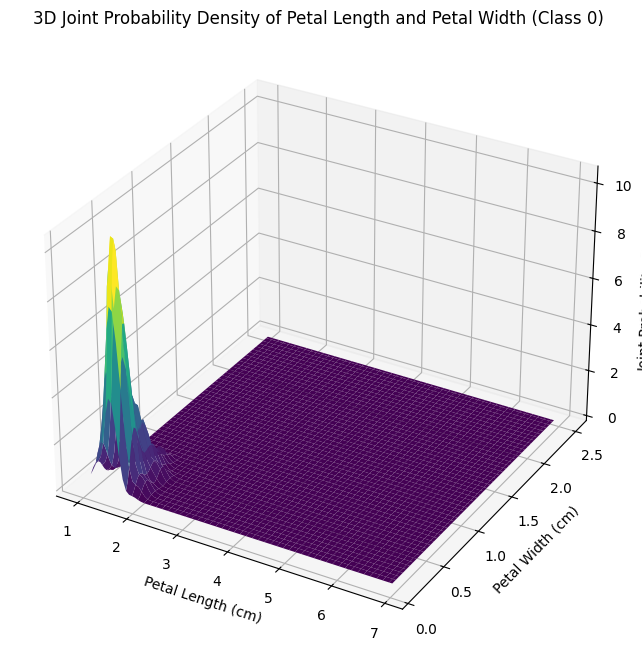

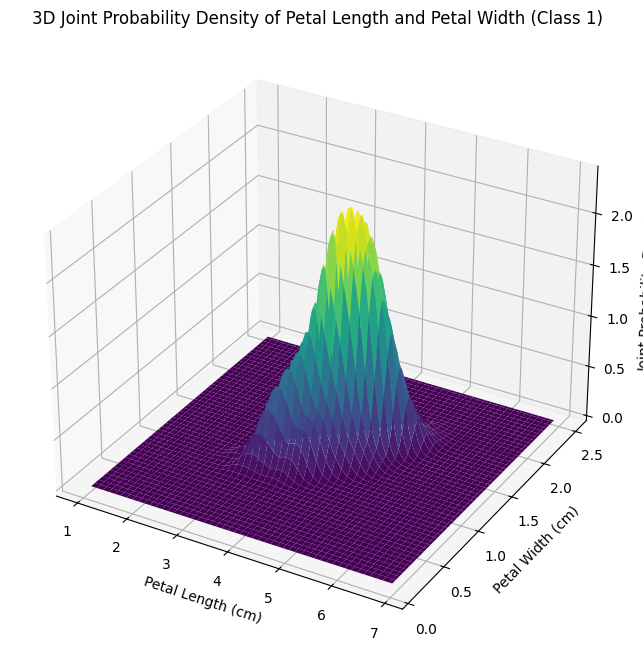

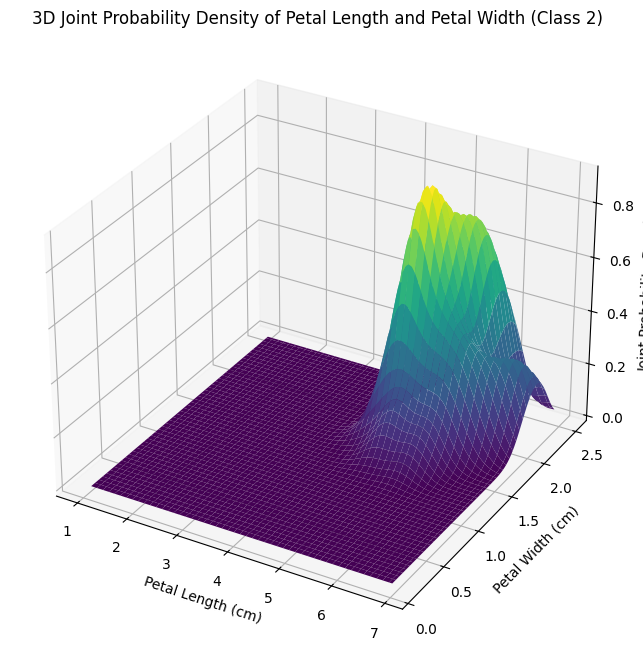

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get unique target values
unique_targets = df['target'].unique()

for target_class in unique_targets:
    # Filter data for the current class
    df_class = df[df['target'] == target_class]

    # Extract petal length and petal width for the current class
    x_petal_class = df_class['petal length (cm)'].values
    y_petal_class = df_class['petal width (cm)'].values

    # Combine the data into a single array for KDE
    data_petal_class = np.vstack([x_petal_class, y_petal_class])

    # Perform Kernel Density Estimation for petal features for the current class
    # Need enough data points for KDE
    if data_petal_class.shape[1] > 1:
        kde_petal_class = gaussian_kde(data_petal_class)

        # Create a grid for plotting the surface for petal features
        # Use the overall min/max for consistent plot ranges
        x_grid_petal, y_grid_petal = np.mgrid[df['petal length (cm)'].min():df['petal length (cm)'].max():100j,
                                              df['petal width (cm)'].min():df['petal width (cm)'].max():100j]
        xy_grid_petal = np.vstack([x_grid_petal.ravel(), y_grid_petal.ravel()])

        # Evaluate the KDE on the grid for petal features for the current class
        z_grid_petal_class = kde_petal_class(xy_grid_petal).reshape(x_grid_petal.shape)

        # Create the 3D plot for petal features for the current class
        fig_petal_class = plt.figure(figsize=(10, 8))
        ax_petal_class = fig_petal_class.add_subplot(111, projection='3d')

        # Plot the surface for petal features for the current class
        ax_petal_class.plot_surface(x_grid_petal, y_grid_petal, z_grid_petal_class, cmap='viridis')

        ax_petal_class.set_xlabel('Petal Length (cm)')
        ax_petal_class.set_ylabel('Petal Width (cm)')
        ax_petal_class.set_zlabel('Joint Probability Density')
        plt.title(f'3D Joint Probability Density of Petal Length and Petal Width (Class {target_class})')

        plt.show()
    else:
        print(f"Not enough data points to perform KDE for class {target_class}")

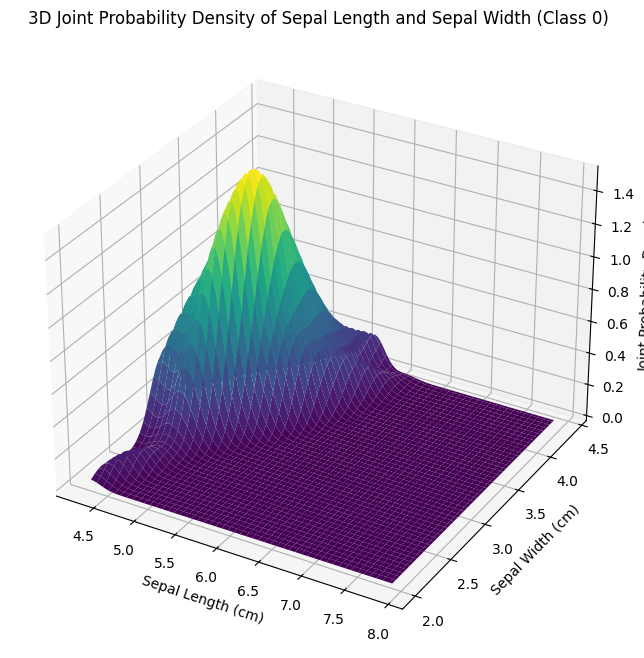

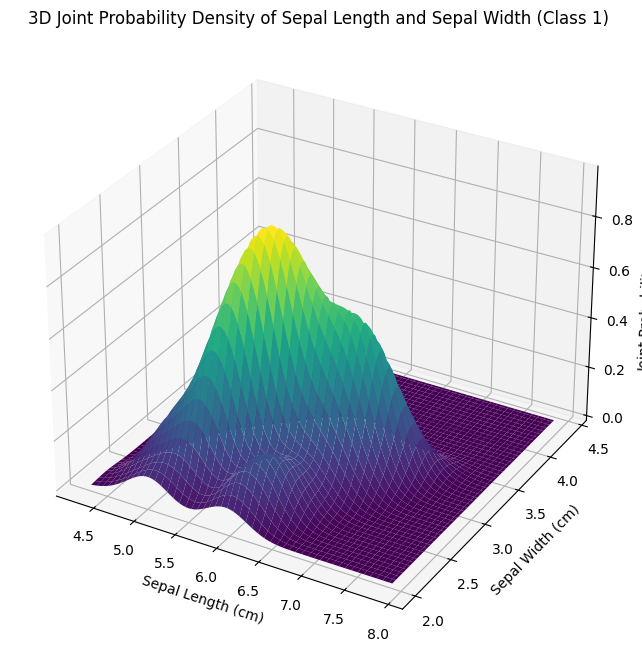

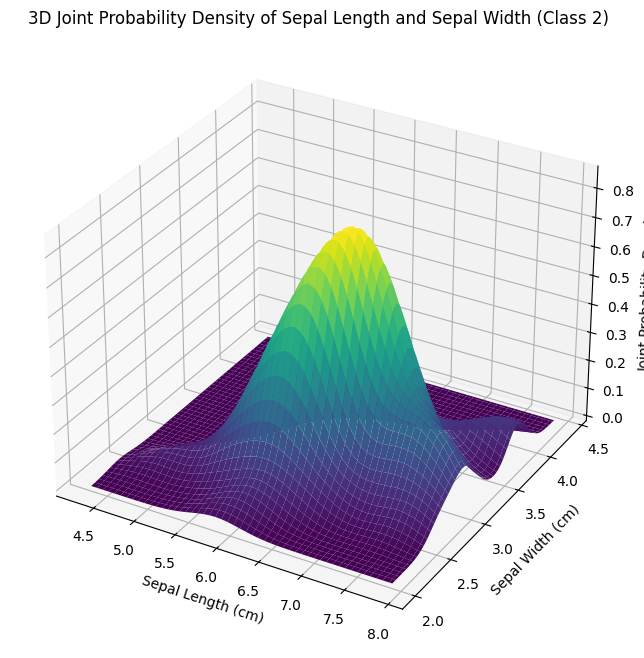

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get unique target values
unique_targets = df['target'].unique()

for target_class in unique_targets:
    # Filter data for the current class
    df_class = df[df['target'] == target_class]

    # Extract sepal length and sepal width for the current class
    x_sepal_class = df_class['sepal length (cm)'].values
    y_sepal_class = df_class['sepal width (cm)'].values

    # Combine the data into a single array for KDE
    data_sepal_class = np.vstack([x_sepal_class, y_sepal_class])

    # Perform Kernel Density Estimation for sepal features for the current class
    # Need enough data points for KDE
    if data_sepal_class.shape[1] > 1:
        kde_sepal_class = gaussian_kde(data_sepal_class)

        # Create a grid for plotting the surface for sepal features
        # Use the overall min/max for consistent plot ranges
        x_grid_sepal, y_grid_sepal = np.mgrid[df['sepal length (cm)'].min():df['sepal length (cm)'].max():100j,
                                              df['sepal width (cm)'].min():df['sepal width (cm)'].max():100j]
        xy_grid_sepal = np.vstack([x_grid_sepal.ravel(), y_grid_sepal.ravel()])

        # Evaluate the KDE on the grid for sepal features for the current class
        z_grid_sepal_class = kde_sepal_class(xy_grid_sepal).reshape(x_grid_sepal.shape)

        # Create the 3D plot for sepal features for the current class
        fig_sepal_class = plt.figure(figsize=(10, 8))
        ax_sepal_class = fig_sepal_class.add_subplot(111, projection='3d')

        # Plot the surface for sepal features for the current class
        ax_sepal_class.plot_surface(x_grid_sepal, y_grid_sepal, z_grid_sepal_class, cmap='viridis')

        ax_sepal_class.set_xlabel('Sepal Length (cm)')
        ax_sepal_class.set_ylabel('Sepal Width (cm)')
        ax_sepal_class.set_zlabel('Joint Probability Density')
        plt.title(f'3D Joint Probability Density of Sepal Length and Sepal Width (Class {target_class})')

        plt.show()
    else:
        print(f"Not enough data points to perform KDE for class {target_class}")

analyse mixed disr=tribution also
